## Observations and Insights 

The study analyzed ten drug regimens and the ability to reduce tumor size in a cohort of mice. The study contained equal distribution of between male and female mice. The most studied drugs were Capomulin and Ramicane as indicated by the total timepoints in the bar charts. In addition to being the drugs which had the most timepoints measured these drugs had lower variation and standard deviations than other drugs that combined with the low standard error of the mean indicates consistent results and the ability to repeat these results if the study was repeated. Capomulin and Ramicane demonstrated the ability to reduce the tumor size over the course of the study (see boxplots). Infubinol and Ceftamin were adisplayed in the box plots to analyze final tumor size had higher final average tumor size which indicates that these drugs were not as effective in reducing tumor size over time. Specific analysis of mouse s185 treated with Capomulin demonstrated the drug’s ability to consistently reduce tumor size over time. Capomulin drug regimen was analyzed further for Mouse Weight and Tumor Volume. This relationship had a strong positive correlation represented by the correlation coefficient of .84. Correlation between the variables show that as the tumor volume decreased so did the weight of the mouse. Typically, this would be an expected result when the tumor size decreases. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy 
%matplotlib inline

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
tumor_df = mouse_metadata.merge (study_results, on = 'Mouse ID')

# Display the data table for preview
tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_num1 = tumor_df['Mouse ID'].nunique()
print(mice_num1)


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = tumor_df.loc[tumor_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicates)

['g989']


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
c_tumor = tumor_df.loc[tumor_df['Mouse ID'] != "g989"]

In [5]:
# Checking the number of mice in the clean DataFrame.
mice_num2 = c_tumor['Mouse ID'].nunique()

print(mice_num2)

248


## Summary Statistics

In [6]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
reg_groups = c_tumor.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
t_mean = reg_groups[('Tumor Volume (mm3)')].mean()
t_median = reg_groups[('Tumor Volume (mm3)')].median()
t_variance = reg_groups[('Tumor Volume (mm3)')].var()
t_std = reg_groups[('Tumor Volume (mm3)')].std()
t_sem = reg_groups[('Tumor Volume (mm3)')].sem()

# Summary Data Frame
t_stats = pd.DataFrame({"Tumor Vol Mean" : t_mean, "Tumor Vol Median" : t_median, "Tumor Vol Variance" : t_variance, "Tumor Vol STD" : t_std, "Tumor Vol SEM" : t_sem})
pd.set_option("display.precision", 2)
t_stats

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol STD,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line
reg_groups['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

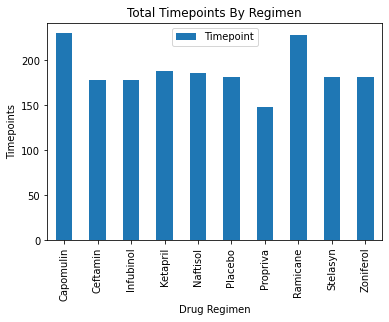

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Count the timepoints by group
regimen_timepoints = reg_groups.agg({"Timepoint":"count"})

#Generate Bar Graph
regimen_timepoints.plot(kind="bar")
plt.title("Total Timepoints By Regimen")
plt.ylabel("Timepoints")
plt.show()

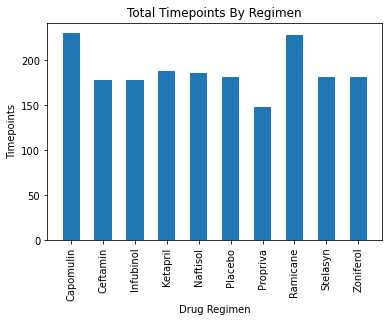

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Set x and y data values
c_tumor1= c_tumor.sort_values(by=['Drug Regimen'])

set_x = c_tumor1["Drug Regimen"].unique()
set_y = regimen_timepoints["Timepoint"]

#Establish dataframe with the values
plt.bar(set_x, set_y, width = .54)

#Chart editing
plt.title("Total Timepoints By Regimen")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()


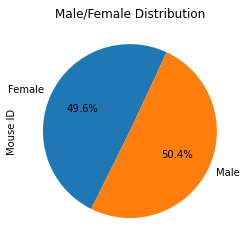

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group Unique mice by sex
male_female = c_tumor.groupby("Sex").nunique()["Mouse ID"]

#Establish Pie Chart 
male_female.plot(kind="pie", autopct='%1.1f%%', startangle=65)
plt.title("Male/Female Distribution")
plt.show()


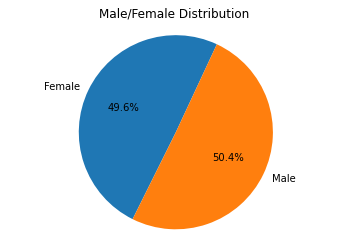

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
pie, pie1 = plt.subplots()
pie1.pie(male_female, labels=labels, autopct='%1.1f%%', startangle=65)
pie1.axis('equal')
plt.title("Male/Female Distribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Capomulin,Ramicane, Infubinol, and Ceftamin
unique_mouse = c_tumor.groupby('Mouse ID')

# Start by getting the last (greatest) timepoint for each mouse
last_time = unique_mouse["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(c_tumor, last_time, on = "Mouse ID")
cleaned = merged.drop_duplicates(subset = ['Mouse ID', 'Timepoint_y'], keep = 'last').reset_index(drop = True)

#Rename Columns in merged dataset
cleaned.rename(columns={"Timepoint_y": "Last Time"}, inplace = True)
cleaned.rename(columns={"Tumor Volume (mm3)": "Final Tumor Vol (mm3)"}, inplace = True)

#Establish Location for each of the four drug regimens
Capomulin = cleaned.loc[cleaned["Drug Regimen"] == "Capomulin"]
Ramicane = cleaned.loc[cleaned["Drug Regimen"] == "Ramicane"]
Infubinol = cleaned.loc[cleaned["Drug Regimen"] == "Infubinol"]
Ceftamin = cleaned.loc[cleaned["Drug Regimen"] == "Ceftamin"]

In [24]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list for tumor vol data 
tumor_vol = []

# Calculate the IQR and identify potential outliers. 
for x in treatment:
    final_tumor_vol = cleaned.loc[cleaned["Drug Regimen"]== x]["Final Tumor Vol (mm3)"]
    tumor_vol.append(final_tumor_vol)
    
#Locate the rows which contain mice on each drug and get the tumor volumes
    quart = final_tumor_vol.quantile([.25,.5,.75])
    lowq = (quart[0.25])
    med = (quart[0.5])
    upq = (quart[0.75])
    iqr = (upq-lowq)
#Determine outliers using upper and lower bounds
    low_b = round(lowq - (1.5*iqr),2)
    up_b = round(upq + (1.5*iqr),2)
    out = final_tumor_vol.loc[(final_tumor_vol > up_b) | (final_tumor_vol < low_b)]

#Establish condition to display the outlier   
    if out.count() != 0:
        print(f"Outlier:{x} {out}")
    

Outlier:Infubinol 74    36.32
Name: Final Tumor Vol (mm3), dtype: float64


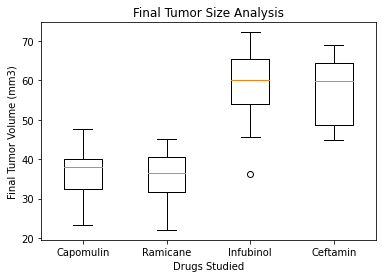

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Establish Box Plot
plt.boxplot(tumor_vol, labels = treatment)

#Box Plot Formatting 
plt.title("Final Tumor Size Analysis")
plt.xlabel("Drugs Studied")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

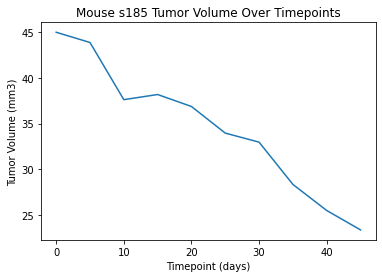

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Find and Select the mouse location by mouse ID
mouse_s185 = c_tumor.loc[c_tumor["Mouse ID"]=="s185"]

#Use mouse location to establish line chart for mouse S185 for time and tumor volume
plt.plot(mouse_s185['Timepoint'], mouse_s185['Tumor Volume (mm3)'])

#Chart formating 
plt.title("Mouse s185 Tumor Volume Over Timepoints")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0.5, 0, 'Mouse Tumor Vol (mm3)')

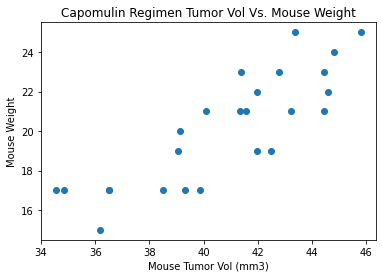

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Find location of Capomulin 
cap = c_tumor.loc[c_tumor["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")

#x values
tumorvol_avg = cap['Tumor Volume (mm3)'].mean()

#y values
cap_w = c_tumor.loc[c_tumor["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
cap_weight = cap_w["Weight (g)"].mean()

#Establish Scatter Plot
plt.scatter(tumorvol_avg, cap_weight)

#Chart Formating 
plt.title("Capomulin Regimen Tumor Vol Vs. Mouse Weight")
plt.ylabel("Mouse Weight")
plt.xlabel("Mouse Tumor Vol (mm3)")

## Correlation and Regression

The correlation coefficient between Mouse Tumor Vol (mm3) and Mouse Weight is 0.84


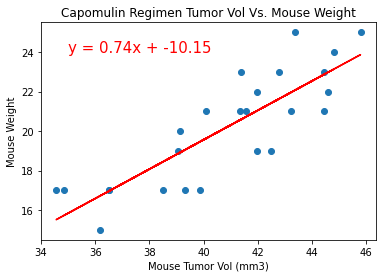

In [17]:
#Calculate and pring correlation coefficient
print(f"The correlation coefficient between Mouse Tumor Vol (mm3) and Mouse Weight is {round(st.pearsonr(tumorvol_avg,cap_weight)[0],2)}")

#Duplicate chart above
plt.scatter(tumorvol_avg, cap_weight)

#Linear regression equation
(slope, intercept, rvalue, pvalue, std_err) = linregress(tumorvol_avg, cap_weight)
regress_values = tumorvol_avg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Place Regression line on plot
plt.plot(tumorvol_avg,regress_values,"r-")
plt.title("Capomulin Regimen Tumor Vol Vs. Mouse Weight")
plt.xlabel('Mouse Tumor Vol (mm3)')
plt.ylabel('Mouse Weight')
plt.annotate(line_eq,(35,24),fontsize=15,color="red")
plt.show()